# ARE 258 Replication Workshop 1 (student copy)
## Article: Modelling the Pattern of Structural Change in U.S. Meat Demand
### Authors: Giancarlo Moschini and Karl D. Meilke

### Replication team: Team #5
### Date: 04/17/2024

-------

# About this notebook
- The section titles starting with **D..** are the ones where we do some hands-on coding. These titles are in black.
- The section titles starting with **Q..** Contain the write-up questions. These sections are in <span style="color:green">green</span> 
- Titles in <span style="color:blue">blue</span> are notes to guide you

- IMPORTANT: This workshop is a graded assignment and your submission will be graded based on:
    - completeness of your code
    - quality of your answer to the questions (the sections with green titles)

# <span style="color:blue">A quick overview of the article</span>

**Background and Motivation:** Consumption patterns for meat products have changed considerably over the last few decades. In particular, consumption of chicken has significantly increased while beef consumption saw a sharp decline. Several hypotheses have been offered to explain this phenomenon. These include (1) productivity gains in poultry that reduced prices of poultry (2) changes in structure of meat demand due to changes in income distribution, demography, and consumer preferences. Past studies have found mixed results regarding the existence of structural change in meat demand, mainly because empirically testing for changes in preferences is difficult since it depends on assumptions made about the form of the underlying utility functions and the models suffer from the problems associated with aggregation across consumers or commodities.  Unlike previous studies, the authors use a model which provides first order approximation to an arbitrary demand system that satisfies perfect aggregation over consumers. 


**Objective of the study:**  To empirically test for the existence of a structural change in the demand for meat in the US and analyse the nature of the structural change.

**Why:** The authors are concerned that if previous studies have systematically underestimated the role of structural change, estimates of demand elasticities may be biased, leading to incorrect market analysis. 

**Structural change:** Refers to a change in the parameters in the system of demand equations.  These changes may be caused by changes in demography, preferences, etc.  The authors ask if a structural change indeed occurred in the US demand for meat, and if these change were abrupt or gradual.

**Model and Method:** The authors use a stochastic and linear version of the AIDS model, which is developed by Deaton and Muellbauer (1980). In addition, they adopt a gradual switching regression framework that provides information on the time path of this change and investigates the bias of structural change on consumption pattern and estimated elasticities. The demand system is estimated using seemingly unrelated regression procedure.

**Data:** Demand for four meats (beef and veal, pork, chicken, and fish) given by quarterly disappearances1 and retail quarterly data over the period 1967-I to 1987-IV (actually 1988 in our dataset).

**Hypothesis:** Ho: model parameters do not change over time (aka no structural change). Rejecting the null suggests that parameters change over time and therefore provides evidence of structural change. The authors reject the null of structural change when comparing full model before and after. Yet, they fail to reject that Marshallian elasticities are statistically different in both periods. 

**Key Assumptions:**  The following important assumptions are made in the study (1) there exist weak separability between these products and all other goods (2) there is common time path for all parameters (aka structural change affects all equations simultaneously)

# D1: Importing and setting up the  data, then replicating figure 1
Note place your data in the same folder as your notebook to avoid wasting time on directory setup.

In [4]:
// ssc install blindschemes, replace

In [5]:
clear all
set more off
set scheme plotplain
import delimited moschini_data.csv, encoding(ISO-8859-1)





(13 vars, 88 obs)


In [6]:
%head

,yr,qtr,period,h,q1,q2,q3,q4,p1,p2,p3,p4,h1
1,1967,1,1,0,18.9,13,8.1599998,2.734,.82700002,.792,.41800001,.93000001,0
2,1967,2,2,0,19.1,13,9.0299997,2.6949999,.83399999,.72399998,.42399999,.96399999,.0099999998
3,1967,3,3,0,20.1,12.9,9.5,2.6600001,.81800002,.74800003,.421,.98100001,.02
4,1967,4,4,0,19.6,15.4,8.8999996,2.5769999,.81699997,.69800001,.38600001,.99400002,.029999999
5,1968,1,5,0,19.700001,15.5,8.6800003,2.5239999,.80699998,.66100001,.38100001,1.007,.050000001
6,1968,2,6,0,20,14,9.6000004,2.5009999,.80599999,.66399997,.38100001,1.002,.059999999
7,1968,3,7,0,20.1,14.3,9.4300003,2.5120001,.84299999,.70200002,.38800001,.99599999,.07
8,1968,4,8,0,19.700001,16.1,8.7700005,2.5599999,.85000002,.66000003,.37200001,.99599999,.079999998
9,1969,1,9,0,20.200001,15.5,8.6999998,2.5929999,.85000002,.66399997,.39199999,1.0039999,.090000004
10,1969,2,10,0,20,14.5,9.3599997,2.6530001,.85699999,.66900003,.40099999,1.0089999,.1


In [7]:
// %browse

## Create labels

In [8]:
label var q1 "beef"
label var q2 "pork"
label var q3 "chicken"
label var q4 "fish" 

label var p1 "beef price"
label var p2 "pork price"
label var p3 "chicken price"
label var p4 "fish price"

## Create time series variable for plots

In [9]:
gen yr_qtr = yq(yr,qtr) // creates a variable called yr_qtr from the year and quarter columns that is a time variable
format yr_qtr %tq

## Set time series variable

In [10]:
tsset yr_qtr, quarterly 

        time variable:  yr_qtr, 1967q1 to 1988q4
                delta:  1 quarter


## Replicate the graph in Figure 1
- Do you see a difference? In our plot, it would appear that fish has much lower consumption than what the one in the Moschini paper. Fish must have been scaled up or normalized in some manner. 

In [11]:
// describe

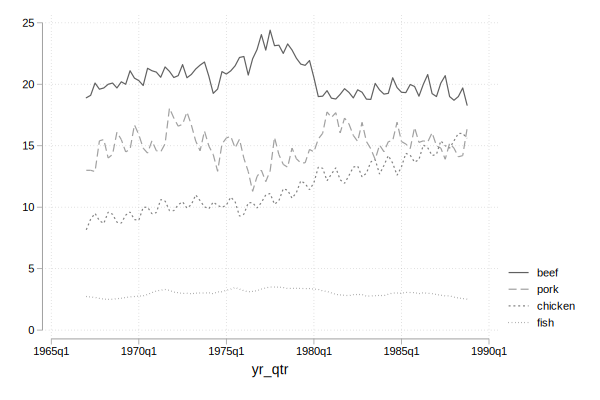

In [12]:
twoway tsline q1-q4

# <span style="color:green">Q1. What variables do you have?</span>

The variables that are shown in this graph are: 
Year and quarter on the X-Axis, and quantities for each product (beef, pork, chicken, and fish) on the Y-Axis. 


The variables in the dataset are: 
Quantities (given by disappearance) for each product (beef, pork, chicken, and fish). 
Prices for each product. 
H- the time path (represented by $\tau$ in the paper)
Period, year, and quarter.


# <span style="color:green">Q2. What are the variables used by Moschini and Meilke (1989)?</span>

The variables used by Moschini and Meilke are: 
Nominal prices, quantity demanded, total expenditure shares, time path, and seasonal dummy variables.

# D2: Generating the variables     
- Clearly M&M performed several manipulations of the data to get it to fit the AIDS model. You’ll need to perform the same manipulations. Use command “gen” to generate the variables you need to use in the AIDS model.

## Create seasonal dummies
- Create a dummy variable for "quarter" $\left(D_{t}\right)$. You only need to create three dummy variables here. Why is that?
- there are many ways to do this. here's one `gen dq1=(qtr==1)`


In [13]:
qui tab qtr, gen (dq)

## Calculate total expenditure for each period
- To get budget share you first need to calculate total expenditure for each period. Do this. Call your new variable "bigx".

In [14]:
gen bigx = q1*p1 + q2*p2 + q3*p3 + q4*p4

In [15]:
label var bigx "total expenditure"

## Calculate budget shares
- Generate your budget shares $\left(w_{i t}\right)$. Look in the right hand column of page 254 if you need guidance. Call them "w1", etc.  

In [16]:
forvalues i = 1(1)4 {
    gen w`i' = q`i' * p`i' / bigx
    label var w`i' "budget share `i'"
}

## Calculate logs of normalized prices (price divided by its mean)
- Create logs of normalized prices $\left(p_{j t}\right)$. By normalizing, it means to divide prices by their sample means before taking logs, as described by M\&M in the data section of their paper. You need to use the command "egen" to generate the sample mean. Call your sample means "mpl", etc. Call the log of normalized prices "In_npl", etc.

In [17]:
forvalues i = 1(1)4 {
egen mp`i' = mean(p`i')              /*calculate the mean price*/
gen ln_np`i' = log(p`i'/mp`i')       /*calculate log of normalized price*/
}

## Calculate the stone price index
- Create the Stone price index, described in the bottom right hand corner of page 254.  Call this “stonegeom”.

You need to construct this:
$$
\ln \left(\boldsymbol{P}^{*}\right)=\sum_{i} w_{i} p_{i}
$$

where $p$ are already in $log()$.

In [18]:
gen stonegeom = (w1*ln_np1) + (w2*ln_np2) + (w3*ln_np3) + (w4*ln_np4)

## Calculate the normalized expenditure (note that stonegeom is already logged, pg 254)
- Create the normalized expenditure variable, $x_{t}$, using the Stone index. Call it "smallx". Remember to divide total expenditure, X, by its sample mean before taking logs, as described by M\&M in the data section of their pape

In [19]:
egen mbigx = mean(bigx)
gen smallx = log(bigx/mbigx) - stonegeom

# <span style="color:blue">About the structural change</span> 

To allow for structural change we transform (1) into (3) with the additional restrictions given by (4):

$$
(1) \quad w_{i t}=\alpha_{i}+\sum_{j} \beta_{i j} p_{j t}+\beta_{i} x_{t}+\Sigma_{k} \alpha_{i k} D_{k}+e_{i t},
$$


$$
(3)\quad w_{i t}=\alpha_{i}+\gamma_{i} h_{t}+\Sigma_{j}\left(\beta_{i j}+\delta_{i j} h_{t}\right) p_{j t} +\left(\beta_{i}+\delta_{i} h_{t}\right) x_{t}+\Sigma_{k}\left(\alpha_{i k}+\gamma_{i k} h_{t}\right) D_{k}+e_{i t}
$$

and 
 
(4.1) $\sum_{j} \delta_{i j}=0$;

(4.2) $\Sigma_{i} \gamma_{i}=0, \quad \Sigma_{i} \delta_{i j}=0, \quad \Sigma_{i} \delta_{i}=0$,

(4.3) $\quad \delta_{i j}=\delta_{j i}$.

# <span style="color:green">Q3.	What do the restrictions in (4) mean?</span>

(4.1) Is the homogeneity property: The time path of structural change is the same for each of the products. ✍️ <span style="color:red"> I don't think the second sentence is correct </span>


(4.2) Is the adding up condition: When we sum up the results from two equations, it will yield net zero. The sum of budget shares of different meats will equal the total expenditure having factored the structural change into the model. ** ✍️ <span style="color:red">I like this style of explanation. It is more natural.</span>



(4.3) Is the Slutsky symmetry condition: When we sum the observations and the products, it is the same as summing the products and the observations (i.e., it does not matter the order in which we sum)

# <span style="color:blue">The switching regimes</span>


With the set of equations (5), equation (3) becomes a gradual switching regression model where $\tau_{1}$ is the end point of the first regime and $\tau_{2}$ is the starting point of the second regime and there is a transition path between the two that is linear.

$(5.1) \quad h_{t}=0 \quad \text { for } t=1, \ldots, \tau_{1}$

$(5.2) \quad h_{t}=\left(t-\tau_{1}\right) /\left(\tau_{2}-\tau_{1}\right)$ for $t=\tau_{1}+1, \ldots, \tau_{2}-1$

(5.3)  $\quad h_{t}=1$ for $t=\tau_{2}, \ldots, T$.

# <span style="color:green">Q4. What is $h_{t}$ conceptually? How do M\&M estimate $h_{t}$. How are $\tau_{1}$ and $\tau_{2}$ computed? </span>

$h_t$ is the time path underlying each of the four products. 
The authors estimate $h_t$ through an iterative process in which their model (5.1), (5.2), (5.3) finds the points at which to the left of $\tau_{1}$, $h_t = 0$ and to the right of $\tau_{1}$, $h_t = 1$. 
The gradual switching model finds the point in which the linear aspect (5.2) is the most extreme. 
$\tau_{1}$ and $\tau_{2}$ are found as the dates between which the linear slope of h(t) is the steepest, implying structural change. 

# <span style="color:blue">Estimating vs using the already estimated $h_t$</span>

Instead of estimating $h_{t}$ like M\&M we are going to use the values they found. They are already in the data, but we need to interact them with the right hand side variables of interest.


# D3: Create interaction terms              
- To create equation (3) from the left hand side column of page 255 we need to create interactions terms for the right hand side variables $p_{t}, x_{t}$, and $D_{t}$. Call them "h"varname.
- recall, equation $ (3)\quad w_{i t}=\alpha_{i}+\gamma_{i} h_{t}+\Sigma_{j}\left(\beta_{i j}+\delta_{i j} h_{t}\right) p_{j t} +\left(\beta_{i}+\delta_{i} h_{t}\right) x_{t}+\Sigma_{k}\left(\alpha_{i k}+\gamma_{i k} h_{t}\right) D_{k}+e_{i t}$
- here's an example `gen hln_np1=h*ln_np1`...
    - feel free to use loops


In [20]:
gen hln_np1 = h*ln_np1
gen hln_np2 = h*ln_np2
gen hln_np3 = h*ln_np3
gen hln_np4 = h*ln_np4

gen hsmallx = h*smallx

gen hdq1 = h*dq1
gen hdq2 = h*dq2
gen hdq3 = h*dq3

# <span style="color:blue">About the error terms </span>
- We’re almost ready to estimate a model, but first we need to think about the error terms.  Look at the assumptions about the error structure in the right hand side column of page 255 (7.1-7.3).


# <span style="color:green">Q5.	What do we assume about the error terms?</span>
Within the same equation and the same time period?
For error terms within the same equation and same time period, we assume first they are multinormally distributed. By (7.1), we assume the expected value of the error term $u_{it}$ = 0. 

Within different equations and the same time periods?
Again we assume they are multinormally distributed. By (7.2), the expected value of the error term is given by some value $\omega_{it}$, which says holding the time period constant, two products may have overlapping error terms. 

In different equations and different time periods?
Again we assume they are multinormally distributed. By (7.3), now when we change the products and the time period, the error terms $u_{it}$ are equal to zero with the exception of when the two time periods are the same, in which case (7.2) applies. 


# <span style="color:green">Q6.	Why do M\&M use first differences when estimating their model?</span>

The authors use first differencing because econometrically, it removes autocorrelation from the model. They also give the explanation that this is a very efficient means of demonstrating the dynamic behavior that often seen in frequent time series data. ✍️ <span style="color:red">you could elaborate more on this. </span>



# D4: Preparing to estimating the first-difference model 
- You need to estimate the system of equations that look like equation 6 (below)
$$
\begin{aligned}
\Delta w_{i t}=& \gamma_{i} \Delta h_{t}+\sum_{j}\left[\beta_{i j} \Delta p_{j t}+\delta_{i j} \Delta\left(h_{t} p_{j t}\right)\right] \\
&+\beta_{i} \Delta x_{t}+\delta_{i} \Delta\left(h_{t} x_{t}\right) \\
&+\sum_{k}\left[\alpha_{i k} \Delta D_{k}+\gamma_{i k} \Delta\left(h_{t} D_{k}\right)\right]+u_{i t}
\end{aligned}
$$


## First, create the first-differenced variables
- Take first differences of all the right hand side variables and the left hand side variables. You will need to use `varname[_n-1]` to refer to the one period lag of observation. 
- you can also use `l.varname` for lags
- also check out the stata difference operator

In [21]:
// Prices and expenditure shares: 
forvalues i = 1/4 {
    gen d_w`i' = d.w`i'
    gen d_ln_np`i'= d.ln_np`i'
    gen d_hln_np`i'= d.hln_np`i'
}


(1 missing value generated)
(1 missing value generated)
(1 missing value generated)
(1 missing value generated)
(1 missing value generated)
(1 missing value generated)
(1 missing value generated)
(1 missing value generated)
(1 missing value generated)
(1 missing value generated)
(1 missing value generated)
(1 missing value generated)


In [22]:
// seasonal items
forvalues i = 1/3 {
    gen d_dq`i' = d.dq`i'
    gen d_hdq`i' = d.hdq`i'
}


(1 missing value generated)
(1 missing value generated)
(1 missing value generated)
(1 missing value generated)
(1 missing value generated)
(1 missing value generated)


In [23]:
// the rest
gen d_smallx = d.smallx
gen d_h = d.h
gen d_hsmallx = d.hsmallx


(1 missing value generated)

(1 missing value generated)

(1 missing value generated)


✍️ <span style="color:red">Useless output above </span>


# <span style="color:blue">OLS vs SUR </span>

The system of equations can be estimated equation-by-equation usingOLS. The OLS estimates are consistent, but generally not as efficient as the SUR estimates. In a nutshell, SUR is like FGLS  with a specific form of the variance-covariance matrix. 
SUR and OLS are equivalent if:
1. the error terms in each equation are uncorrelated
2. each equation contains exactly the same set of regressors  

# D5: Estimating the first difference model using OLS
- Run each of the four equations separately using OLS.
    - How can we think about the coefficient on ‘d_h’?
- hint: some of your regressors are  `d_h d_ln_np1 d_ln_np2 d_ln_np3 ...` 
- IMPORTANT: pay attention to the approach below. we don't want huge regression results. we need clean tables. 

Hint: use global


In [24]:
global rhs d_h d_ln_np1 d_ln_np2 d_ln_np3 d_ln_np4 d_dq1 d_dq2 d_dq3 d_smallx ///
        d_hln_np1 d_hln_np2 d_hln_np3  d_hln_np4 d_hsmallx d_hdq1 d_hdq2 d_hdq3 

In [25]:
qui{
eststo ols1: reg d_w1 $rhs
eststo ols2: reg d_w2 $rhs
eststo ols3: reg d_w3 $rhs 
eststo ols4: reg d_w4 $rhs
}

In [26]:
esttab, se title("OLS Estimates for the Time-Varying AIDS model")


OLS Estimates for the Time-Varying AIDS model
----------------------------------------------------------------------------
                      (1)             (2)             (3)             (4)   
                     d_w1            d_w2            d_w3            d_w4   
----------------------------------------------------------------------------
d_h                0.0139         -0.0155          0.0130         -0.0114   
                 (0.0212)        (0.0189)       (0.00761)       (0.00763)   

d_ln_np1           0.0836*        0.00684         -0.0443***      -0.0461***
                 (0.0356)        (0.0317)        (0.0128)        (0.0128)   

d_ln_np2           0.0175          0.0141         -0.0161         -0.0155   
                 (0.0298)        (0.0265)        (0.0107)        (0.0107)   

d_ln_np3          -0.0492*        -0.0290          0.0870***     -0.00878   
                 (0.0217)        (0.0194)       (0.00780)       (0.00782)   

d_ln_np4          -0.0860

# D6: Estimating the first difference model using SUR
-  Use command `sureg(eq1: varname varname) (eq2: varname varname)` etc.  


## Unrestricted SUR

In [27]:
global rhs d_h d_ln_np1 d_ln_np2 d_ln_np3 d_ln_np4 d_dq1 d_dq2 d_dq3 d_smallx ///
        d_hln_np1 d_hln_np2 d_hln_np3  d_hln_np4 d_hsmallx d_hdq1 d_hdq2 d_hdq3 

In [28]:
qui sureg (eq1:d_w1 $rhs) (eq2:d_w2 $rhs) (eq3:d_w3 $rhs)
estimates store model1

In [29]:
eststo clear
esttab, unstack se title("SUR Estimates for the Time-Varying AIDS model (unrestricted)")




SUR Estimates for the Time-Varying AIDS model (unrestricted)
------------------------------------------------------------
                      (1)                                   
                     d_w1                                   
                      eq1             eq2             eq3   
------------------------------------------------------------
d_h                0.0139         -0.0155          0.0130   
                 (0.0189)        (0.0168)       (0.00678)   

d_ln_np1           0.0836**       0.00684         -0.0443***
                 (0.0317)        (0.0282)        (0.0114)   

d_ln_np2           0.0175          0.0141         -0.0161   
                 (0.0265)        (0.0236)       (0.00951)   

d_ln_np3          -0.0492*        -0.0290          0.0870***
                 (0.0193)        (0.0173)       (0.00695)   

d_ln_np4          -0.0860          0.0465         -0.0167   
                 (0.0599)        (0.0534)        (0.0215)   

d_dq1           

### Store estimated values for testing later on

In [30]:
estimates store usur1 

### Store the log likelihood  for a LR test later on

In [31]:
//* ereurn list
scalar ll_h0=e(ll)
display ll_h0



1173.7287


## Restricted SUR
- First, use command `constraint define 1 [eq1]vaname+[eq2]varname=0` etc. Then use command `sureg(eq1: varname varname) (equ2: varname varname), constrain(1, 2, 3)` etc. 
- The equations reduce to three, and the constraints also reduce 
- You only need to put in the symmetry equations (see footnote 1, p. 255): 
    - *Because the adding-up conditions (2.2) will be satisfied by definition by the estimating model, the symmetry constraints (2.3) will always imply the remaining homogeneity restrictions (2.1).*


### First, define the constraints (restrictions)
- example of a symmetry constraint: `constraint define 1 [eq1]d_ln_np2=[eq2]d_ln_np1 /*beta_12 = beta_21*/
`

In [32]:
constraint define 1 [eq1]d_ln_np2=[eq2]d_ln_np1 /*beta_12 = beta_21*/
constraint define 2 [eq1]d_ln_np3=[eq3]d_ln_np1 /*beta_13 = beta_31*/
constraint define 3 [eq2]d_ln_np3=[eq3]d_ln_np2 /*beta_23 = beta_32*/

constraint define 4 [eq1]d_hln_np2=[eq2]d_hln_np1 /*delta_12 = delta_21*/
constraint define 5 [eq1]d_hln_np3=[eq3]d_hln_np1 /*delta_13 = delta_31*/
constraint define 6 [eq2]d_hln_np3=[eq3]d_hln_np2 /*delta_23 = delta_32*/

constraint define 70 [eq1]d_ln_np1+[eq1]d_ln_np2+[eq1]d_ln_np3+[eq1]d_ln_np4 = 0 // sum of betas in eq1 is 0 
constraint define 80 [eq2]d_ln_np1+[eq2]d_ln_np2+[eq2]d_ln_np3+[eq2]d_ln_np4 = 0 // sum of betas in eq2 is 0 
constraint define 90 [eq3]d_ln_np1+[eq3]d_ln_np2+[eq3]d_ln_np3+[eq3]d_ln_np4 = 0 // sum of betas in eq3 is 0 

constraint define 100 [eq1]d_hln_np1+[eq1]d_hln_np2+[eq1]d_hln_np3+[eq1]d_hln_np4 = 0 // sum of deltas in eq1 is 0 
constraint define 110 [eq2]d_hln_np1+[eq2]d_hln_np2+[eq2]d_hln_np3+[eq2]d_hln_np4 = 0 // sum of deltas in eq2 is 0 
constraint define 120 [eq3]d_hln_np1+[eq3]d_hln_np2+[eq3]d_hln_np3+[eq3]d_hln_np4 = 0 // sum of deltas in eq3 is 0 


### Then run the SUR model by imposing the constraints

In [33]:
qui sureg (eq1:d_w1 d_h d_ln_np1 d_ln_np2 d_ln_np3 d_ln_np4 d_dq1 d_dq2 d_dq3 d_smallx d_hln_np1 d_hln_np2 d_hln_np3 d_hln_np4 d_hsmallx d_hdq1 d_hdq2 d_hdq3) ///
          (eq2:d_w2 d_h d_ln_np1 d_ln_np2 d_ln_np3 d_ln_np4 d_dq1 d_dq2 d_dq3 d_smallx d_hln_np1 d_hln_np2 d_hln_np3 d_hln_np4 d_hsmallx d_hdq1 d_hdq2 d_hdq3 ) ///
          (eq3:d_w3 d_h d_ln_np1 d_ln_np2 d_ln_np3 d_ln_np4 d_dq1 d_dq2 d_dq3 d_smallx d_hln_np1 d_hln_np2 d_hln_np3 d_hln_np4 d_hsmallx d_hdq1 d_hdq2 d_hdq3) ///
    , constraint(1 2 3 4 5 6 70 80 90 100 110 120) isure


In [34]:
eststo clear
esttab, unstack se title("SUR Estimates for the Time-Varying AIDS model (restricted)")




SUR Estimates for the Time-Varying AIDS model (restricted)
------------------------------------------------------------
                      (1)                                   
                     d_w1                                   
                      eq1             eq2             eq3   
------------------------------------------------------------
d_h                0.0144         -0.0162         0.00526   
                 (0.0123)        (0.0114)       (0.00487)   

d_ln_np1           0.0839**        0.0135         -0.0503***
                 (0.0267)        (0.0219)       (0.00933)   

d_ln_np2           0.0135          0.0198         -0.0207*  
                 (0.0219)        (0.0225)       (0.00822)   

d_ln_np3          -0.0503***      -0.0207*         0.0865***
                (0.00933)       (0.00822)       (0.00681)   

d_ln_np4          -0.0470***      -0.0126         -0.0154*  
                 (0.0115)       (0.00990)       (0.00644)   

d_dq1             

### Store estimated values for testing later on

In [35]:
estimates store rsur1

### Store the log likelihood again

In [36]:
* ereurn list
scalar ll_h0=e(ll)
display ll_h0



1159.83


# <span style="color:green">Q7.	Compare the coefficients and standard errors from OLS with unrestricted SUR.  What do you see?  Why?  How about OLS versus restricted SUR?</span>

Comparing the OLS model to the unrestricted SUR, first the unrestricted SUR model has much smaller standard errors than the OLS. The coefficient estimates between the two however, are the same. The advantage of the SUR model here is that it has smaller standard errors compared to the OLS model. The reason for this is that the SUR model allows for multiple equation interaction, whereas OLS does not. The implication here is that SUR estimates with more information and therefore it estimates it better. 

Comparing the OLS to the restricted SUR: The same intuition applies; there is nothing obvious about the difference in coefficient estimates.


# <span style="color:green">Q8.	The authors’ estimate all combinations of $\tau_1$ and $\tau_2$ to find their optimal values based on maximum likelihood. On p258, they note “figure 2 suggests that a variety of structural change paths cannot be rejected.” What does this mean?</span>

Figure 2 illustrates a heat map, which shows that there are other combinations of $\tau_1$ and $\tau_2$ that are statistically significant, and "tell a different story". This means that if we change the threshold, there will be different estimates that affect the timeline of structural change in the model. This is important because it implies that the 1975 and 1976 "threshold" is only one way of defining the pattern of shift in consumption for these products. ✍️ <span style="color:red"> You could elaborate more on this. For instance, what impact would that have on the value of their paper? </span>



# D7: Formal testing for additional restrictions
- Add restrictions that set all “h” coefficients to zero (no structural change) to existing restrictions
- Do a likelihood ratio test between the previous restricted model and this restricted model.  Recall that .  

## Restrict the model to "no structural change"
- include restrictions 1-6 from before, and
- define remaining restrictions on structural change (see table 2)

### A total of 3 intercept constraints (restrictions)

In [37]:
constraint define 7 [eq1]d_h=0
constraint define 8 [eq2]d_h=0
constraint define 9 [eq3]d_h=0

### A total of 6 price constraints (restrictions)

In [38]:
// price constraints
constraint define 10 [eq1]d_hln_np1=0
constraint define 11 [eq1]d_hln_np2=0
constraint define 12 [eq2]d_hln_np2=0
constraint define 13 [eq2]d_hln_np3=0
constraint define 14 [eq3]d_hln_np1=0
constraint define 15 [eq3]d_hln_np3=0

### A total of 3 expenditure constraints (restrictions)

In [39]:
// expenditure constraints
constraint define 16 [eq1]d_hsmallx=0
constraint define 17 [eq2]d_hsmallx=0
constraint define 18 [eq3]d_hsmallx=0

### A total of 9 seasonal FE constraints (restrictions)

In [40]:
constraint define 19 [eq1]d_hdq1 = 0
constraint define 20 [eq2]d_hdq1 = 0
constraint define 21 [eq3]d_hdq1 = 0
constraint define 22 [eq1]d_hdq2 = 0
constraint define 23 [eq2]d_hdq2 = 0
constraint define 24 [eq3]d_hdq2 = 0
constraint define 25 [eq1]d_hdq3 = 0
constraint define 26 [eq2]d_hdq3 = 0
constraint define 27 [eq3]d_hdq3 = 0

## Run the regression subject to the new set of constraints

In [41]:
qui sureg (eq1:d_w1 $rhs) (eq2:d_w2 $rhs) (eq3:d_w3 $rhs), constraint(1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27) isure
estimates store model2

## Store the estimates

In [42]:
estimates store rsur2

## Report the results

In [43]:
esttab, unstack se title("SUR Estimates for the Time-Invariant AIDS model (restricted, new restrictions)")


SUR Estimates for the Time-Invariant AIDS model (restricted, new restrictions)
------------------------------------------------------------
                      (1)                                   
                     d_w1                                   
                      eq1             eq2             eq3   
------------------------------------------------------------
d_h                     0               0               0   
                      (.)             (.)             (.)   

d_ln_np1           0.0821***       0.0179         -0.0468***
                 (0.0163)        (0.0137)       (0.00618)   

d_ln_np2           0.0179          0.0262         -0.0233***
                 (0.0137)        (0.0148)       (0.00613)   

d_ln_np3          -0.0468***      -0.0233***       0.0827***
                (0.00618)       (0.00613)       (0.00520)   

d_ln_np4          -0.0513        -0.00943          0.0144   
                 (0.0497)        (0.0469)        (0.0200)   



## Perform a LR test

In [44]:
// getting log likelihood
scalar ll_h0=e(ll)
display ll_h0

// running the lr test: 
lrtest rsur1 rsur2



1144.7719


Likelihood-ratio test                                 LR chi2(15) =     30.12
(Assumption: rsur2 nested in rsur1)                   Prob > chi2 =    0.0115


# D8: Estimate the unrestricted SUR model using an alternative time path
- We have so far adopted the time path $h_{t}$ that M\&M estimated. Now estimate the unrestricted SUR model assuming this alternative time path : $\tau_{1}=1967-I$ and $\tau_{2}=1988-I V$
- Compare the value of the log-likelihood with the unrestricted SUR you estimated using the $h_{t}$ computed by $\mathrm{M}$ \& $\mathrm{M}$.


In [45]:
// Changing all variables that use h, to use those with h1
gen hln_np1_1 = h1*ln_np1
gen hln_np2_1 = h1*ln_np2
gen hln_np3_1 = h1*ln_np3
gen hln_np4_1 = h1*ln_np4

gen hsmallx_1 = h1*smallx

gen hdq1_1 = h1*dq1
gen hdq2_1 = h1*dq2
gen hdq3_1 = h1*dq3

In [46]:
forvalues i = 1/3 {
    gen d_hdq`i'_1 = d.hdq`i'_1
}


(1 missing value generated)
(1 missing value generated)
(1 missing value generated)


In [47]:
gen d_h_1 = d.h1

(1 missing value generated)


In [48]:
gen d_hsmallx_1 = d.hsmallx_1

(1 missing value generated)


In [49]:
forvalues i = 1/4 {
    gen d_hln_np`i'_1= d.hln_np`i'_1
}


(1 missing value generated)
(1 missing value generated)
(1 missing value generated)
(1 missing value generated)


In [50]:
global rhs2 d_h_1 d_ln_np1 d_ln_np2 d_ln_np3 d_ln_np4 d_dq1 d_dq2 d_dq3 d_smallx ///
        d_hln_np1_1 d_hln_np2_1 d_hln_np3_1  d_hln_np4_1 d_hsmallx_1 d_hdq1_1 d_hdq2_1 d_hdq3_1 


In [51]:
global rhs d_h d_ln_np1 d_ln_np2 d_ln_np3 d_ln_np4 d_dq1 d_dq2 d_dq3 d_smallx ///
        d_hln_np1 d_hln_np2 d_hln_np3  d_hln_np4 d_hsmallx d_hdq1 d_hdq2 d_hdq3 

## Run the regression using then new variables

In [52]:
qui sureg (eq1:d_w1 $rhs2) (eq2:d_w2 $rhs2) (eq3:d_w3 $rhs2)

In [53]:
estimates store usur3 

In [54]:
esttab, unstack se title("SUR Estimates for the Time-Invariant AIDS model (unrestricted, new different time path)")


SUR Estimates for the Time-Invariant AIDS model (unrestricted, new different tim
> e path)
------------------------------------------------------------
                      (1)                                   
                     d_w1                                   
                      eq1             eq2             eq3   
------------------------------------------------------------
d_h_1               0.101          0.0288         -0.0134   
                  (0.189)         (0.168)        (0.0641)   

d_ln_np1           0.0786          0.0359         -0.0570***
                 (0.0499)        (0.0444)        (0.0170)   

d_ln_np2           0.0227        -0.00869         -0.0186   
                 (0.0389)        (0.0345)        (0.0132)   

d_ln_np3          -0.0386         -0.0244          0.0762***
                 (0.0305)        (0.0271)        (0.0104)   

d_ln_np4          -0.0695          0.0142        -0.00261   
                 (0.0634)        (0.0563)        (

## get the log-likelihood value to compare with with the unrestricted SUR you estimated using the $h_{t}$ computed by M\&M.

In [55]:
scalar ll_h1=e(ll)
display ll_h1



1176.6746


# <span style="color:green">Q9.	Interpret the implications of your findings in D8.</span>

We defined our time path differently, and this changed the results in our table in terms of the coefficient estimates, as well as which variables are statistically significant, and which ones are not significant. There is also a larger log-likelihood under the new time path which suggests that this is a stronger model specification. The issue with this new time path however, is that of course there will be strong evidence of structural change across a 20 + year timeframe, but that does not provide the same insight when we define our $\tau$ parameters in a more narrow timeframe. 


# <span style="color:green">Q10.	Do you think there is structural change in the model?  Why or why not?   Does the restricted or unrestricted model give more evidence of structural change?  </span>

Yes, consistent with the paper, we make the same conclusion that there is structural change in the model. This is supported by the statistical significance of the parameters on quantity. The restricted model is preferred to the unrestricted model because these restrictions guarentee that the axioms of transitivity, homogeneity, and symmetry hold. 


# <span style="color:green">Q11.How do your coefficients compare with M\&M?  Can you think of any reason they might be different?</span>

Comparing our coefficient estimates in each table to table 1 reported by M\&M, the coefficient values are different. These differences could be attributed to earlier on setup (i.e., creating the variables) and model estimation. Another potential explanation is that the analysis was run in 1989, whereas we are running ours in 2024, so the Stata computing may have slightly changed over time.


____________

**Max 20 points possible**
1. Max 3 points for completely running code (no errors). ✍️ +3
    - you got this one
2. Max 1 point for clean code (no useless output). ✍️ +0
    - you did have some useless output. This one is 1 or 0
3. Max 7 points for coding questions ✍️ +7
    - great effort 
4. Max 7 points for write-up questions +5
    - I appreciate short responses but sometimes your responses lack details. 
5. Max 2 points for using markdown efficiently (e.g. math mode when needed, or bullet points, or coloring, etc.) ✍️ +1
    - You can do better
    


**Total: 16**